# Stock Dynamics

## Table of Content


[Data Description](#Data-Description)

[Summary Statistics](#Summary-Statistics)

[Visualizing Stock Dymanics](#Visualazing-Stock-Dynamics)

[Monthly Trends](#Monthly-Trends)

## Data Description

A stock market is where buyers and sellers trade shares of a company, and is one of the most popular ways for individuals and companies to invest money. The size of the world stock market  is now estimated to be in the trillions. The largest stock market in the world is the New York Stock Exchange (NYSE), located in New York City. About 2,800 companies are listed on the NYSE. In this problem, we'll look at the monthly stock prices of five of these companies: _IBM_, _General Electric (GE)_, _Procter and Gamble_, _Coca Cola_, and _Boeing_. The data used in this problem comes from Infochimps.

Download and read the following files into R, using the read.csv function: `IBMStock.csv`, `GEStock.csv`, `ProcterGambleStock.csv`, `CocaColaStock.csv`, and `BoeingStock.csv`.

Call the data frames "IBM", "GE", "ProcterGamble", "CocaCola", and "Boeing", respectively. Each data frame has two variables, described as follows:

* **Date**: the date of the stock price, always given as the first of the month.

* **StockPrice**: the average stock price of the company in the given month.

In this problem, we'll take a look at how the stock dynamics of these companies have changed over time.

## Summary Statistics

Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
IBM = pd.read_csv("../Data/IBMStock.csv")
GE = pd.read_csv("../Data/GEStock.csv")
ProcterGamble = pd.read_csv("../Data/ProcterGambleStock.csv")
CocaCola = pd.read_csv("../Data/CocaColaStock.csv")
Boeing = pd.read_csv("../Data/BoeingStock.csv") 

In [3]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
Date          480 non-null object
StockPrice    480 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


Before working with these data sets, we need to convert the dates into `Date` object

In [4]:
IBM["Date"] = pd.to_datetime(IBM["Date"])
GE["Date"] = pd.to_datetime(GE["Date"])
ProcterGamble["Date"] = pd.to_datetime(ProcterGamble["Date"])
CocaCola["Date"] = pd.to_datetime(CocaCola["Date"])
Boeing["Date"] = pd.to_datetime(Boeing["Date"])

How many observations are there in each data set?

In [5]:
IBM.shape
GE.shape
ProcterGamble.shape
CocaCola.shape
Boeing.shape

(480, 2)

What is the earliest year in our datasets?

In [6]:
print(IBM["Date"].dt.year.min())
print(GE["Date"].dt.year.min())
print(ProcterGamble["Date"].dt.year.min())
print(CocaCola["Date"].dt.year.min())
print(Boeing["Date"].dt.year.min())

1970
1970
1970
1970
1970


What is the latest year in our datasets?

In [7]:
print(IBM["Date"].dt.year.max())
print(GE["Date"].dt.year.max())
print(ProcterGamble["Date"].dt.year.max())
print(CocaCola["Date"].dt.year.max())
print(Boeing["Date"].dt.year.max())

2009
2009
2009
2009
2009


What is the mean stock price of IBM over this time period?

In [8]:
IBM["StockPrice"].mean()

144.3750303076664

What is the minimum stock price of General Electric (GE) over this time period?

In [9]:
GE["StockPrice"].min()

9.2936363639999993

What is the maximum stock price of Coca-Cola over this time period?

In [10]:
CocaCola["StockPrice"].max()

146.58428569999998

What is the median stock price of Boeing over this time period?

In [11]:
Boeing["StockPrice"].median()

44.88339827

What is the standard deviation of the stock price of Procter & Gamble over this time period?

In [12]:
ProcterGamble["StockPrice"].std()

18.19414030797156

## Visualizing Stock Dynamics

Let's plot the stock prices to see if we can visualize trends in stock prices during this time period. Using the plot function, plot the Date on the x-axis and the StockPrice on the y-axis.

In [13]:
import matplotlib as mpl

print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [14]:
# mpl.style.use(['ggplot']) # optional: for ggplot-like style

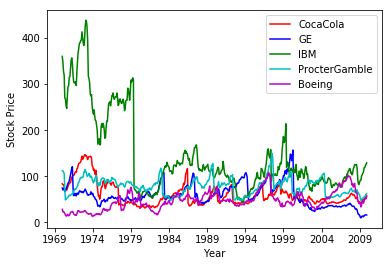

In [15]:
plt.plot(CocaCola["Date"], CocaCola["StockPrice"], "r-", label = "CocaCola")
plt.plot(GE["Date"], GE["StockPrice"], "b-", label = "GE")
plt.plot(IBM["Date"], IBM["StockPrice"], "g-", label = "IBM")
plt.plot(ProcterGamble["Date"], ProcterGamble["StockPrice"], "c-", label = "ProcterGamble")
plt.plot(Boeing["Date"], Boeing["StockPrice"], "m-", label = "Boeing")

plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Monthly Trends

For IBM, compare the monthly averages to the overall average stock price. In which months has IBM historically had a higher stock price (on average)?

In [16]:
IBM["Month"] = IBM["Date"].dt.month
IBM["StockPrice"].groupby(IBM["Month"]).mean() > IBM["StockPrice"].mean()

Month
1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: StockPrice, dtype: bool

General Electric and Coca-Cola both have their highest average stock price in the same month. Which month is this?

In [18]:
GE["Month"] = GE["Date"].dt.month
GE_by_month= GE["StockPrice"].groupby(GE["Month"]).mean().to_frame()
GE_by_month.rename(columns = {"StockPrice":"AvgStockPrice" }, inplace = True)
GE_by_month.loc[GE_by_month["AvgStockPrice"] == GE_by_month["AvgStockPrice"].max()]

,AvgStockPrice
Month,
4,64.480092


In [19]:
CocaCola["Month"] = CocaCola["Date"].dt.month
CC_by_month= CocaCola["StockPrice"].groupby(CocaCola["Month"]).mean().to_frame()
CC_by_month.rename(columns = {"StockPrice":"AvgStockPrice" }, inplace = True)
CC_by_month.loc[CC_by_month["AvgStockPrice"] == CC_by_month["AvgStockPrice"].max()]

,AvgStockPrice
Month,
4,62.688882
